# Predictions About Epileptic Seizures Detections

#### Ozar Ömer Uncu - 21727815 
#### Uğurcan Bağrıyanık - 21526701

In this project we used pre-processed and re-structured/reshaped version of a very commonly used dataset featuring epileptic seizure detection. Each data point is the value of the EEG recording at a different point in time.
*   EEG(electroencephalogram) is a test that detects electrical activity in your brain using small, metal discs (electrodes) attached to your scalp.

We have 5 types of reactions by have epileptic seizure or not have epileptic seizure.4 types of reactions not have seizure only rest one has seizure by features. We will be reduce our dataset to have epileptic seizure or not. We used and compared various classification methods (RandomForestClassifier, KNeighborsClassifier, SVM, Decision Tree Classifier, XGBClassifier) in the project. We choosed which contributes best accuracy score.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import svm, tree
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
%matplotlib inline

## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

Epilepsy is a fairly common neurological disorder that affects 65 million people around the world. Anyone can develop epilepsy, but it’s more common in young children and older adults. It occurs slightly more in males than in females. It can predicted by humans from EEG results. It can contribute some problems at sometimes.


In this experiment we want to show people, detecting seizure can be predictible by machine learning methods. This notebook provides predictions from 178 data features. 
We have advantages of more features by combine them with PCA method. This notebook also contribute reduce workload of neurologists. 
This notebook also not not provide solving problem but it can helps to detect some classes from data. 



## Data Understanding<a class="anchor" id="data_understanding"></a>

As you can see below, we first read our dataset from file with has extension csv. We read dataframe to panda dataframe. And then we want to show distribution of categories of EEG results. We can see from there, we have same amount of classes at our dataframe. We can say this also from table at under the graph. You can see mean of our Y columns data is equals to 3. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


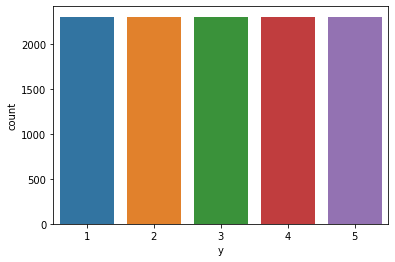

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,...,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,...,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,-1765.000000,-1803.000000,-1833.000000,-1867.000000,-1870.000000,-1839.000000,-1867.000000,-1856.000000,-1844.000000,-1717.000000,-1764.000000,-1856.000000,-1844.000000,-1866.000000,-1863.000000,-1866.00000,-1781.000000,-1860.000000,-1818.000000,-1867.000000,-1743.000000,-1517.000000,-1552.000000,-1720.000000,-1864.000000,-1814.000000,-1829.000000,-1851.000000,-1840.000000,-1673.000000,...,-1867.000000,-1826.000000,-1866.000000,-1854.000000,-1789.000000,-1872.000000,-1866.000000,-1675.000000,-1778.000000,-1733.000000,-1862.000000,-1861.000000,-1857.000000,-1839.000000,-1860.000000,-1843.000000,-1863.000000,-1861.000000,-1845.000000,-1820.000000,-1864.000000,-1868.000000,-1855.000000,-1852.000000,-1870.000000,-1847.000000,-1578.000000,-1838.000000,-1763.0000

In [ ]:
df = pd.read_csv("Epileptic Seizure Recognition.csv")
sns.countplot(df['y'],label="Count")
plt.show()
df.describe()


You can see general informations about each columns at above. You can see min, max values from table. Next we need to see our data cells data types for our future processes. You can see our data types at below. We do not need any convert in database.

In [ ]:
print(df.dtypes)

Unnamed    object
X1          int64
X2          int64
X3          int64
X4          int64
            ...  
X175        int64
X176        int64
X177        int64
X178        int64
y           int64
Length: 180, dtype: object


As mentioned at purpose part, we need to reduce our classes to 0(Not have epileptic seizure) or 1(Have epileptic seizure). We just need two attributes for our notebook to determine have seizure or not. You can see distribution of have seizure or not from below graph. We can see, who hasn't got seizure equals to 4 times who has seizure.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


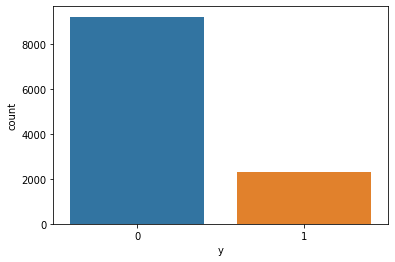

In [ ]:
#change values to have epileptic seizure or not 
df['y'] = np.where(df['y'] >1, 0,  1)
df.y.value_counts()
df_type = df.y
sns.countplot(df.y,label="Count")
plt.show()

## Data Preparation<a class="anchor" id="data_preparation"></a>

In [ ]:
df.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

First we need to drop our class column and assign to new dataframe. At future processes we need this column for compare predicted values. We haven't any missing values at our dataframe so we did not drop any row for this reason. You can see at above.

In [ ]:
df.head(20)
df_droppep = df.drop(["y","Unnamed"],axis = 1)


### Correlation between columns
We can see correlations between columns from heatmap which placed below. We put this map for the drop columns first but then generally feautures has not high relations between them so we choose to keep them all. We will deal with this problem at the later on. 

    X1   X2   X3   X4   X5   X6   X7  ...  X172  X173  X174  X175  X176  X177  X178
0  135  190  229  223  192  125   55  ...   -31   -77  -103  -127  -116   -83   -51
1  386  382  356  331  320  315  307  ...   146   152   157   156   154   143   129
2  -32  -39  -47  -37  -32  -36  -57  ...    48    19   -12   -30   -35   -35   -36

[3 rows x 178 columns]


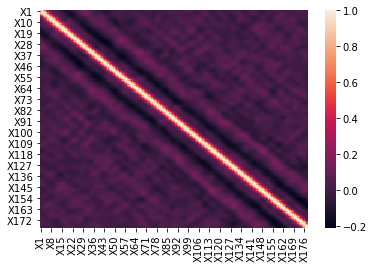

In [ ]:
label_encoder = LabelEncoder()
df.iloc[:,0] = label_encoder.fit_transform(df.iloc[:,0])
corr = df_droppep.corr()
sns.heatmap(corr)
print(df_droppep.head(3))

We need to normalize our data because we have lots of negative values at our dataset. It can provides errors or not desired predicts. We choose Min-max normalization for our dataframe. 
*   **Min-max normalization** also known as min-max scaling or min-max normalization, is the simplest method and consists of rescaling the range of features to scale the range in [0, 1] or [−1, 1].
Selecting the target range depends on the nature of the data. The general formula is
given as: 

  𝑥'=𝑥−𝑚𝑖𝑛(𝑥)/(𝑚𝑎𝑥(𝑥)−𝑚𝑖𝑛(𝑥))

  where x is an original value, x’s is the normalized value.

You can see how our data change by MinMaxScaler.


In [ ]:
scalar = MinMaxScaler() 
scalar.fit(df_droppep)
ND = scalar.transform(df_droppep)
ND = pd.DataFrame(ND)
print(df_droppep.head())
print(ND.head())

    X1   X2   X3   X4   X5   X6   X7  ...  X172  X173  X174  X175  X176  X177  X178
0  135  190  229  223  192  125   55  ...   -31   -77  -103  -127  -116   -83   -51
1  386  382  356  331  320  315  307  ...   146   152   157   156   154   143   129
2  -32  -39  -47  -37  -32  -36  -57  ...    48    19   -12   -30   -35   -35   -36
3 -105 -101  -96  -92  -89  -95 -102  ...   -80   -77   -85   -77   -72   -69   -65
4   -9  -65  -98 -102  -78  -48  -16  ...   -12   -32   -41   -65   -83   -89   -73

[5 rows x 178 columns]
        0         1         2    ...       175       176       177
0  0.553717  0.571107  0.584371  ...  0.434953  0.435612  0.474893
1  0.624123  0.625176  0.620328  ...  0.505486  0.495495  0.522970
2  0.506872  0.506618  0.506229  ...  0.456113  0.448331  0.478900
3  0.486396  0.489158  0.492356  ...  0.446447  0.439322  0.471154
4  0.513324  0.499296  0.491789  ...  0.443574  0.434022  0.469017

[5 rows x 178 columns]


## Modeling<a class="anchor" id="modeling"></a>

In [ ]:
class_X = df_droppep.copy()
class_y = df_type
X_train,X_test,y_train,y_test = train_test_split(class_X,class_y,test_size =0.30)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

First we split our data for train and test values by %70 and %30. We create array for take same process to all classifier methods. We compare 5 different classification moodel by our train and test data. Let's give small explanations about these methods.


* The XGBoost stands for eXtreme Gradient Boosting, which is a boosting 
algorithm based on gradient boosted decision trees algorithm. XGBoost applies a better regularization technique to reduce overfitting, and it is one of the differences from the gradient boosting.
---
* The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.
---
*   A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning.
---
*   Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.
---
*   KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. 
---
As you can see above we mentioned about classification methods. We compare them at below. For our dataset we need to choose best method which provides best accuracy point.

In [ ]:
classifiers = []
model1 = xgboost.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5 = KNeighborsClassifier()
classifiers.append(model5)


for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    print("********************************")


Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) is 0.9643478260869566
********************************
Accuracy of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is 0.9628985507246377
********************************
Accuracy of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, m

With the highest point 0.97-0.98 we choosed Random Forest Classification for our dataframe predictions. In our point this classification method gives us best point because from the we need to 2 class for prediction. We have advantages of use random forest classification like :


*   Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.
*   It does not suffer from the overfitting problem. The main reason is that it 
takes the average of all the predictions, which cancels out the biases.
*   You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.


We have lots of columns at our dataset so we need to merge them to have higher quality result. For this we are going to use PCA method.
*   The principal components of a collection of points in a real coordinate space are a sequence of p unit vectors, where the i-th vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors.

We print first graph for components and variance for choose how many components are we going to create for our pipeline. As you can see from graph we have elbow at number of components between 30 and 50. So we can choose 45 components for our pipeline structure. 



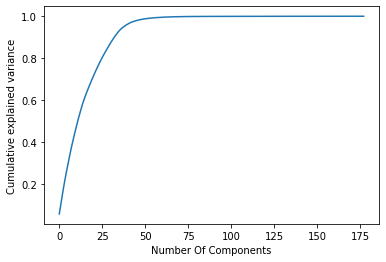

In [ ]:

pca = PCA(whiten= True).fit(df_droppep)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number Of Components')
plt.ylabel("Cumulative explained variance")
plt.show()

We create our pipeline with PCA and RandomForestClassifier methods. Pca with 45 components. Also we want to see difference between two classification methods. So, we choose SVC for compare with our main classifier method.

In [ ]:
pipe = Pipeline([('pca', PCA(n_components = 45)),('forest', RandomForestClassifier())])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)



rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_vPCA = rfc.predict(X_test)

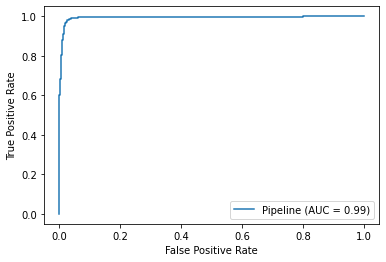

In [ ]:

pipe2 = Pipeline([('pca', PCA(n_components = 45)),('svc',SVC(random_state=42))])
svc = pipe2.fit(X_train,y_train)
y_pred_svc = pipe2.predict(X_test)
svc_disp = plot_roc_curve(svc ,X_test, y_test)
plt.show()


In [ ]:
P

## Evaluation<a class="anchor" id="evaluation"></a>

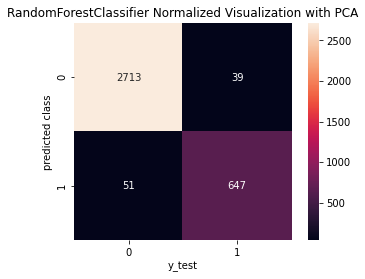

In [ ]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T,square = True , annot = True, fmt = 'd')
plt.title("RandomForestClassifier Normalized Visualization with PCA")
plt.xlabel('y_test')
plt.ylabel('predicted class')
plt.show()

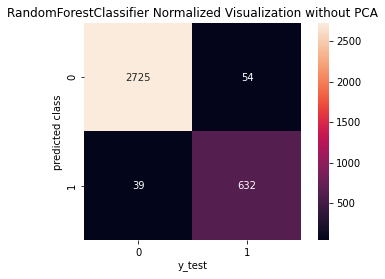

In [ ]:
mat = confusion_matrix(y_test, y_pred_vPCA)
sns.heatmap(mat.T,square = True , annot = True, fmt = 'd')
plt.title("RandomForestClassifier Normalized Visualization without PCA")
plt.xlabel('y_test')
plt.ylabel('predicted class')
plt.show()

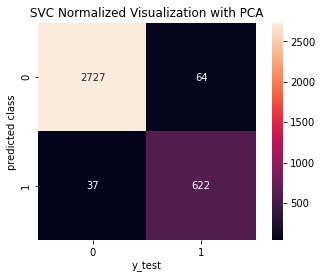

In [ ]:
mat = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(mat.T,square = True , annot = True, fmt = 'd')
plt.title("SVC Normalized Visualization with PCA")
plt.xlabel('y_test')
plt.ylabel('predicted class')
plt.show()

Evaluate your model. Provide results, tables, charts, etc.

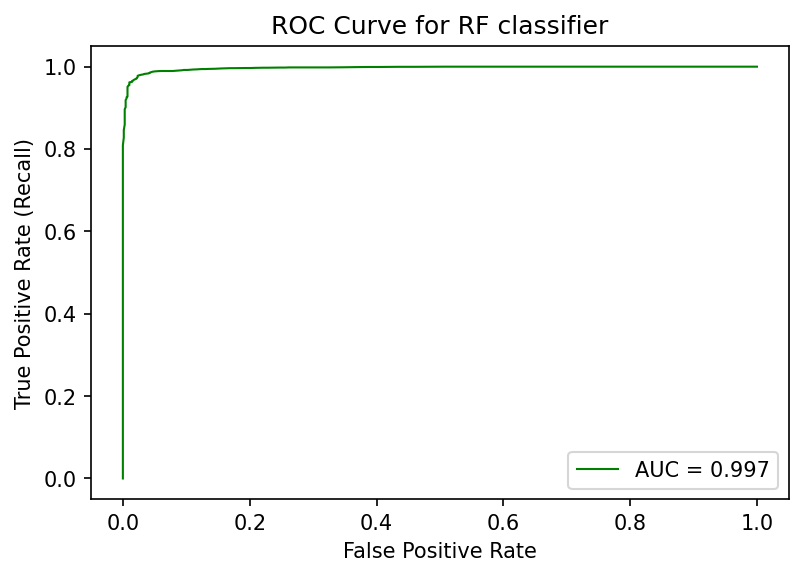

In [ ]:
from sklearn.metrics import roc_curve, auc

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

probas = rf_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


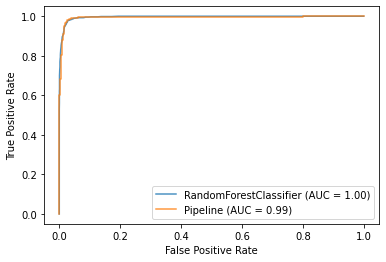

In [ ]:
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()


We compare two classification method with thier auc score. We choosed random forest classifier before from its better accuracy. But We want to show differences at their performance. You can see differences between heatmaps as well. There is little difference with svc and randomforest classifier. 

At last we can see our prediction methods work with nice accuracy. From these methods can improvable and it can help neurologist for detect epileptic seizure. 

## References<a class="anchor" id="references"></a>

**All the sources we used during our work.**

*   https://www.kaggle.com/jaketuricchi/using-pca-and-clustering-to-improve-classification
*   https://machinelearningmastery.com/calculate-feature-importance-with-python/#:~:text=Feature%20importance%20refers%20to%20techniques,at%20predicting%20a%20target%20variable.
*   https://www.datacamp.com/community/tutorials/random-forests-classifier-python
*   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
*   https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
*   https://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html
*   https://www.kaggle.com/harunshimanto/epileptic-seizure-recognition
*   https://www.healthline.com/health/epilepsy
*   https://www.datatechnotes.com/2019/07/classification-example-with.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
*   https://www.datacamp.com/community/tutorials/decision-tree-classification-python
*   https://en.wikipedia.org/wiki/Principal_component_analysis
*   https://medium.com/@gulcanogundur/pca-principal-component-analysis-temel-bile%C5%9Fenler-analizi-bf9098751c62



**Disclaimer!** <font color='grey'>This notebook was prepared by Ozar Ömer Uncu and Uğurcan Bağrıyanık as an assigment for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>